<a href="https://colab.research.google.com/github/AdamClarkStandke/GenerativeDeepLearning/blob/main/textInversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/huggingface/diffusers
!cd diffusers
!pip install /content/diffusers/.

In [ ]:
!cd examples/textual_inversion
!pip install -r /content/diffusers/examples/textual_inversion/requirements.txt

In [ ]:
from accelerate.utils import write_basic_config
write_basic_config()

In [ ]:
!pip install huggingface_hub

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
MODEL_NAME="runwayml/stable-diffusion-v1-5"
DATA_DIR="/content/drive/MyDrive/data_dir/"

!accelerate launch /content/diffusers/examples/textual_inversion/textual_inversion.py \
  --pretrained_model_name_or_path="runwayml/stable-diffusion-v1-5"\
  --train_data_dir="/content/drive/MyDrive/data_dir/" \
  --learnable_property="object" \
  --placeholder_token="<my-face>" \
  --initializer_token="face" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=4 \
  --max_train_steps=3000 \
  --learning_rate=5.0e-04 \
  --scale_lr \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --output_dir="/content/textual_inversion_face" \
  --push_to_hub

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

pipeline = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16).to("cuda")

In [ ]:
pipeline.load_textual_inversion("/content/textual_inversion_face/learned_embeds.safetensors")

In [ ]:
prompt = "man with <my-face>"

  0%|          | 0/400 [00:00<?, ?it/s]

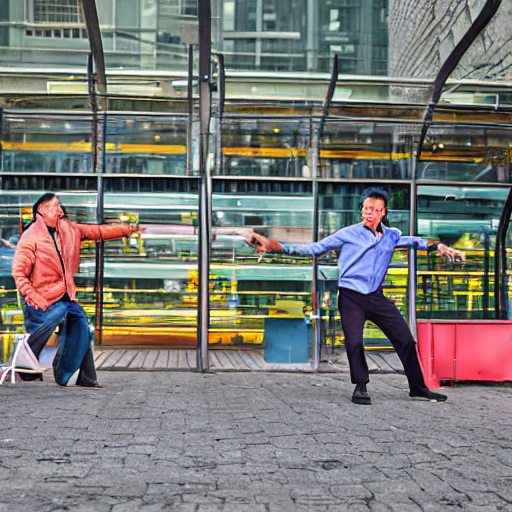

In [ ]:
image = pipeline(prompt=prompt, negative_prompt="bad anatomy", num_inference_steps=400).images[0]
image.save("boss.png")
image